<a href="https://colab.research.google.com/github/ganeshutah/Jove/blob/master/For_CS3100_Fall2024/08_Min_DFA/MT1_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6464, done.
remote: Counting objects: 100% (1830/1830), done.
remote: Compressing objects: 100% (705/705), done.
remote: Total 6464 (delta 1089), reused 1752 (delta 1045), pack-reused 4634 (from 1)
Receiving objects: 100% (6464/6464), 10.30 MiB | 7.63 MiB/s, done.
Resolving deltas: 100% (4094/4094), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)

# Some material that motivates the need for NFA and Regular Expressions (RE)

* Impossibility of concatenating DFA
   - You can union, intersect, complement DFA
   - You can minimize DFA rather directly

* But
  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

* So, we introduce NFA and Regular Expressions (RE)
  - NFA are the graph-form of the required generalization of DFA
  - Every DFA is an NFA
  - NFA are more liberal, in that they include four new situations
    - They can jump to multiple places on a single symbol
    - They can jump to a state via an epsilon transition ('' moves or $\varepsilon$ moves)
    - They need not jump from a state to another state on all symbols
       - In fact, they can have perfect dead-end states (in a DFA you may not have them)
    - NFA can start from multiple initial states


* But
  - NFA are pretty gnarly and error-prone
     - No reasonable person would design them by hand
  - Fortunately, we have a notation called RE (regular expressions)
     - They are NOTHING but the language notations you learned about a while ago, except
        - They are not in math notation
        - Instead they are in nice ASCII text that is computer-readable
     - AND
        - You put together RE only in three ways
          - Union
          - Concatenation
          - Star
        - i.e.
          - You don't have intersection
          - You don't have complement
        - AND STILL
          - they can describe all regular languages
* Here are some facts
  - You cannot directly complement NFA or RegExp
  - You can convert NFA to RE
  - Conversion of RE to NFA is even easier and more fun and modular
  - There is no direct way to minimize NFA (or RE)
    - we basically turn them into DFA and then minimize
      - But then we may pay the price -- exponential blow-up

* FINALLY
  - Those large DFA can now be expressed in an exponentially succinct using NFA or RE
  - And we can perform the concatenation (missing with DFA)


* Let us see all these through examples

## Showing why it is hard to concatenate DFA and why they are exponential sometimes

  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

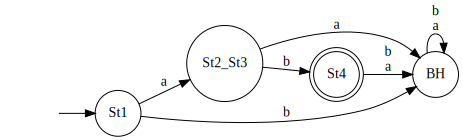

In [58]:
# How can we concatenate D1 and D2? Can't put a bridge from D1's final state to D2's initlal state. What will the bridge be labeled by?
# I'll use RE to draw DFA quickly... that part will be explained later.
# D1's language is "ab" and that of D2 is "cd"

D1 = min_dfa(nfa2dfa(re2nfa("ab")))
dotObj_dfa_w_bh(D1,FuseEdges=True)

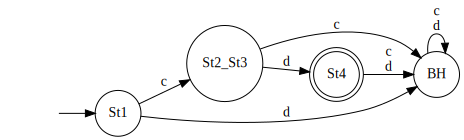

In [59]:
D2 = min_dfa(nfa2dfa(re2nfa("cd")))
dotObj_dfa_w_bh(D2,FuseEdges=True)

### Can't bridge from the first DFA's St4 to the second DFA's initial state (or other things)... there is no direct concatenation approach.

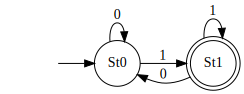

In [60]:
# Now let's see DFA for "Nth-last bit is a 1" grow exponentially large as N increases
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1"))))


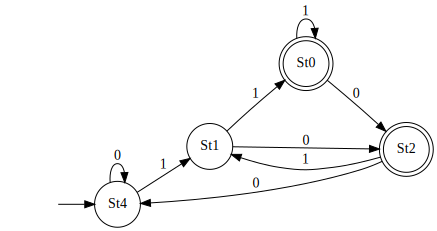

In [61]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)"))))

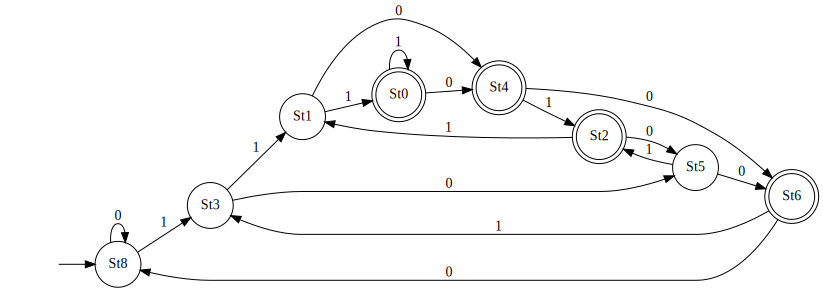

In [62]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)"))))

### It is getting larger; so let's check how the number of states grow.

In [67]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1")))["Q"])

2

In [68]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)")))["Q"])

4

In [69]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)")))["Q"])

8

In [70]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)(0+1)")))["Q"])

16

In [71]:
len(min_dfa(nfa2dfa(re2nfa("(0+1)*1(0+1)(0+1)(0+1)(0+1)")))["Q"])

32

# Some material that motivates the need for NFA and Regular Expressions (RE)

* Impossibility of concatenating DFA
   - You can union, intersect, complement DFA
   - You can minimize DFA rather directly

* But
  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

* So, we introduce NFA and Regular Expressions (RE)
  - NFA are the graph-form of the required generalization of DFA
  - Every DFA is an NFA
  - NFA are more liberal, in that they include four new situations
    - They can jump to multiple places on a single symbol
    - They can jump to a state via an epsilon transition ('' moves or $\varepsilon$ moves)
    - They need not jump from a state to another state on all symbols
       - In fact, they can have perfect dead-end states (in a DFA you may not have them)
    - NFA can start from multiple initial states


* But
  - NFA are pretty gnarly and error-prone
     - No reasonable person would design them by hand
  - Fortunately, we have a notation called RE (regular expressions)
     - They are NOTHING but the language notations you learned about a while ago, except
        - They are not in math notation
        - Instead they are in nice ASCII text that is computer-readable
     - AND
        - You put together RE only in three ways
          - Union
          - Concatenation
          - Star
        - i.e.
          - You don't have intersection
          - You don't have complement
        - AND STILL
          - they can describe all regular languages
* Here are some facts
  - You cannot directly complement NFA or RegExp
  - You can convert NFA to RE
  - Conversion of RE to NFA is even easier and more fun and modular
  - There is no direct way to minimize NFA (or RE)
    - we basically turn them into DFA and then minimize
      - But then we may pay the price -- exponential blow-up

* FINALLY
  - Those large DFA can now be expressed in an exponentially succinct using NFA or RE
  - And we can perform the concatenation (missing with DFA)


* Let us see all these through examples

# Some material that motivates the need for NFA and Regular Expressions (RE)

* Impossibility of concatenating DFA
   - You can union, intersect, complement DFA
   - You can minimize DFA rather directly

* But
  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

* So, we introduce NFA and Regular Expressions (RE)
  - NFA are the graph-form of the required generalization of DFA
  - Every DFA is an NFA
  - NFA are more liberal, in that they include four new situations
    - They can jump to multiple places on a single symbol
    - They can jump to a state via an epsilon transition ('' moves or $\varepsilon$ moves)
    - They need not jump from a state to another state on all symbols
       - In fact, they can have perfect dead-end states (in a DFA you may not have them)
    - NFA can start from multiple initial states


* But
  - NFA are pretty gnarly and error-prone
     - No reasonable person would design them by hand
  - Fortunately, we have a notation called RE (regular expressions)
     - They are NOTHING but the language notations you learned about a while ago, except
        - They are not in math notation
        - Instead they are in nice ASCII text that is computer-readable
     - AND
        - You put together RE only in three ways
          - Union
          - Concatenation
          - Star
        - i.e.
          - You don't have intersection
          - You don't have complement
        - AND STILL
          - they can describe all regular languages
* Here are some facts
  - You cannot directly complement NFA or RegExp
  - You can convert NFA to RE
  - Conversion of RE to NFA is even easier and more fun and modular
  - There is no direct way to minimize NFA (or RE)
    - we basically turn them into DFA and then minimize
      - But then we may pay the price -- exponential blow-up

* FINALLY
  - Those large DFA can now be expressed in an exponentially succinct using NFA or RE
  - And we can perform the concatenation (missing with DFA)


* Let us see all these through examples

# Some material that motivates the need for NFA and Regular Expressions (RE)

* Impossibility of concatenating DFA
   - You can union, intersect, complement DFA
   - You can minimize DFA rather directly

* But
  - You can't concatenate DFA directly
  - Some DFA are guaranteed exponential 😞

* So, we introduce NFA and Regular Expressions (RE)
  - NFA are the graph-form of the required generalization of DFA
  - Every DFA is an NFA
  - NFA are more liberal, in that they include four new situations
    - They can jump to multiple places on a single symbol
    - They can jump to a state via an epsilon transition ('' moves or $\varepsilon$ moves)
    - They need not jump from a state to another state on all symbols
       - In fact, they can have perfect dead-end states (in a DFA you may not have them)
    - NFA can start from multiple initial states


* But
  - NFA are pretty gnarly and error-prone
     - No reasonable person would design them by hand
  - Fortunately, we have a notation called RE (regular expressions)
     - They are NOTHING but the language notations you learned about a while ago, except
        - They are not in math notation
        - Instead they are in nice ASCII text that is computer-readable
     - AND
        - You put together RE only in three ways
          - Union
          - Concatenation
          - Star
        - i.e.
          - You don't have intersection
          - You don't have complement
        - AND STILL
          - they can describe all regular languages
* Here are some facts
  - You cannot directly complement NFA or RegExp
  - You can convert NFA to RE
  - Conversion of RE to NFA is even easier and more fun and modular
  - There is no direct way to minimize NFA (or RE)
    - we basically turn them into DFA and then minimize
      - But then we may pay the price -- exponential blow-up

* FINALLY
  - Those large DFA can now be expressed in an exponentially succinct using NFA or RE
  - And we can perform the concatenation (missing with DFA)


* Let us see all these through examples

# The portion below will consist of the 10 questions in Quiz-5.
### _(Far below, you'll find material you can practice for MT1)_

------------------------------------


## IN QUIZ-5 WE WILL TRAVERSE THE KLEENE-PIPELINE or otherwise known as the Regular Language Conversion Pipeline (Kleene was a famous scientist in this area who contributed to many things in this subject. The star operator is called the Kleene-star often.

# BACKGROUND MATERIAL TO TEACH YOU SOME BASICS + HAVE YOU DO QUIZ-5

### The idea of regular expressions will be reinforced in this exercise. When we have the language $\{a,bc\}\{d\}+\varepsilon$, the regular expression corresponding to this is (a+bc)(d)('') or even (a+bc)d('') or finally also (a+bc)d'' where we assume that having the parenthesis around d and '' makes it more readable. Let's test this out.

Generating LALR tables


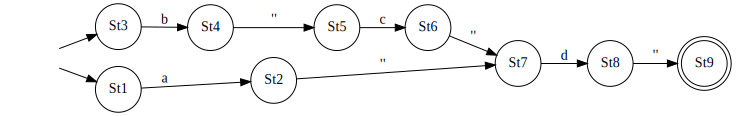

In [2]:
dotObj_nfa(re2nfa("(a+bc)(d)('')"))

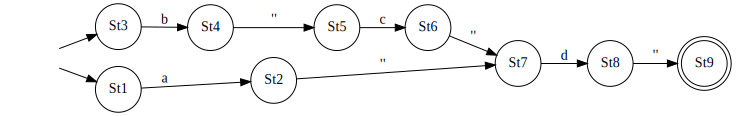

In [3]:
dotObj_nfa(re2nfa("(a+bc)d''"))

### So it is clear that my regular-expression parser --- something you'll be studying later --- can parse all these variants of regular expressions.

### What you are seeing in the diagrams above are NFA. See that NFA are nothing but compilations of RE into a graphical form that stitches together the individual compilations of "a", "b", "c", "d", and "''"

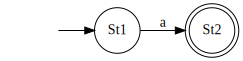

In [4]:
dotObj_nfa(re2nfa("a"))

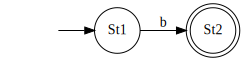

In [5]:
dotObj_nfa(re2nfa("b"))

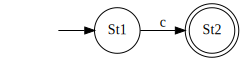

In [6]:
dotObj_nfa(re2nfa("c"))

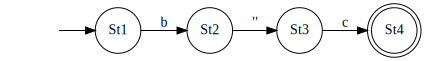

In [7]:
dotObj_nfa(re2nfa("bc"))

## Question-1

## Question-2

-----------------------

------------------------------

## Question-3

-----------------------

------------------------------

## Question-4

-----------------------

-----------------------

------------------------------

## Question-5

-----------------------

------------------------------

## Question-6

-----------------------

------------------------------

## Question-7

-----------------------

------------------------------

## Question-8

-----------------------

------------------------------

## Question-9

-----------------------

------------------------------

## Question-10

-----------------------

------------------------------

# This notebook was assigned for MT1 practice in 2022. You can see that below this text box and keep that in mind as a learning goal. But above this text box, I have set material for Quiz-5 that gradually builds toward this goal.

In [8]:
def diff_RE(R1,R2):
    '''
    Given R1 and R2, here is the the code to return (D1,D2)
    where D1 is the min DFA of Lang(R1)-Lang(R2)
    and D2 is the min DFA of Lang(R2)-Lang(R1)
    '''
    MD1=min_dfa_brz(nfa2dfa(re2nfa(R1)))
    MD2=min_dfa_brz(nfa2dfa(re2nfa(R2)))

    cMD1 = comp_dfa(MD1)
    cMD2 = comp_dfa(MD2)

    D1minus2 = min_dfa_brz(intersect_dfa(MD1, cMD2))
    D2minus1 = min_dfa_brz(intersect_dfa(MD2, cMD1))

    return (D1minus2, D2minus1)


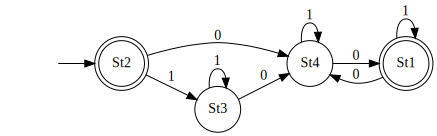

In [9]:
# Sigma = {0,1}; "2n zeros for n >= 0"

RE2 = "(1* 0 1* 0 1*)*"
m2 = min_dfa(nfa2dfa(re2nfa(RE2)))
dotObj_dfa(m2)

In [10]:
dotObj_dfa(m2).render('m2')

'm2.pdf'

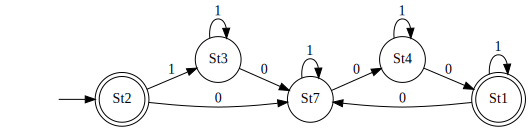

In [11]:
# 3n 0's, n >= 0

RE3 = "(1* 0 1* 0 1* 0 1*)*"
m3 = min_dfa(nfa2dfa(re2nfa(RE3)))
dotObj_dfa(m3)

In [12]:
dotObj_dfa(m3).render('m3')

'm3.pdf'

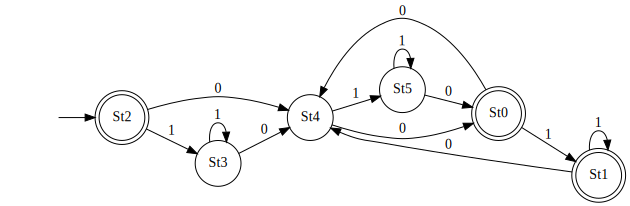

In [13]:
dfa2big = nfa2dfa(re2nfa(RE2))
dotObj_dfa(dfa2big)

In [14]:
dfa_unmin = md2mc('''

DFA
IF : 1  ->  St3
IF : 0  ->  St4
St4: 0  ->  F0
St4: 1  ->  St5
St3: 0  ->  St4
St3: 1  ->  St3
F0 : 0  ->  St4
F0 : 1  ->  F1
St5: 0  ->  F0
St5: 1  ->  St5
F1 : 0  ->  St4
F1 : 1  ->  F1
''')

Generating LALR tables


In [15]:
dotObj_dfa(dfa_unmin).render('dfa_unmin')

'dfa_unmin.pdf'

In [16]:
dfa_min = min_dfa(dfa_unmin, state_name_mode = 'verbose', chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  F1  and  St3  are 0-distinguished.
States  F1  and  St5  are 0-distinguished.
States  F1  and  St4  are 0-distinguished.
States  St3  and  F0  are 0-distinguished.
States  St3  and  IF  are 0-distinguished.
States  F0  and  St5  are 0-distinguished.
States  F0  and  St4  are 0-distinguished.
States  St5  and  IF  are 0-distinguished.
States  St4  and  IF  are 0-distinguished.
--------------------------------------------- 
 Dyn Prog Table Version 0 is :
--------------------------------------------- 
	 St3 	 0
	 F0 	 .	0
	 St5 	 0	.	0
	 St4 	 0	.	0	.
	 IF 	 .	0	.	0	0

		 F1	St3	F0	St5	St4
--------------------------------------------- 
 
Seeing if states  F1  and  F0  can now be distinguished by any symbol.
   The next states reached via symbol  0  are:  St4  and  St4
      Nope. Symbol  0  could

In [17]:
dfa_unmin_rev = rev_dfa(dfa_unmin)

In [18]:
dotObj_nfa(dfa_unmin_rev).render('dfa_unmin_rev')

'dfa_unmin_rev.pdf'

In [19]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



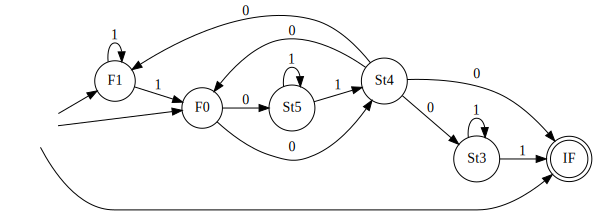

In [20]:
dotObj_nfa(dfa_unmin_rev)

In [21]:
dfa_unmin_rev_det = nfa2dfa(dfa_unmin_rev, STATENAME_MAXSIZE=80)

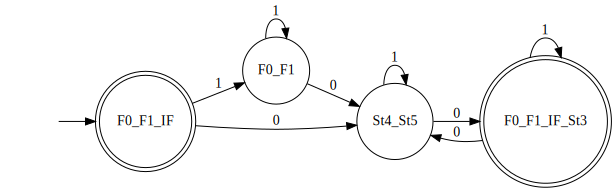

In [22]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80)

In [23]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80).render('dfa_unmin_rev_det')

'dfa_unmin_rev_det.pdf'

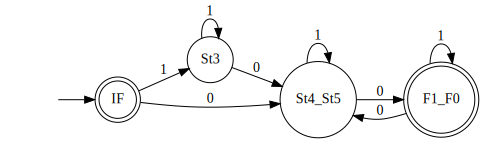

In [24]:
dotObj_dfa(dfa_min)

In [25]:
mEven0_mOdd0 = intersect_dfa(m2,m3)

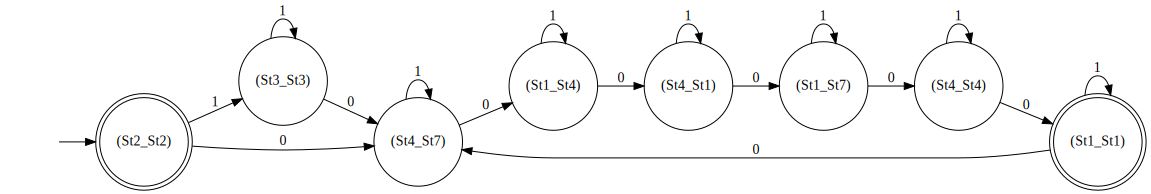

In [26]:
dotObj_dfa(mEven0_mOdd0)

In [27]:
dotObj_dfa(mEven0_mOdd0).render('m2_and_m3')

'm2_and_m3.pdf'

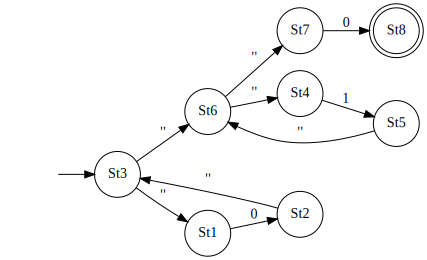

In [28]:
nfa0s1s0 = re2nfa("0* 1* 0")
dotObj_nfa(nfa0s1s0)

In [29]:
dotObj_nfa(nfa0s1s0).render('nfa0s1s0')

'nfa0s1s0.pdf'

In [30]:
dfa0s1s0 = nfa2dfa(nfa0s1s0, STATENAME_MAXSIZE=80)

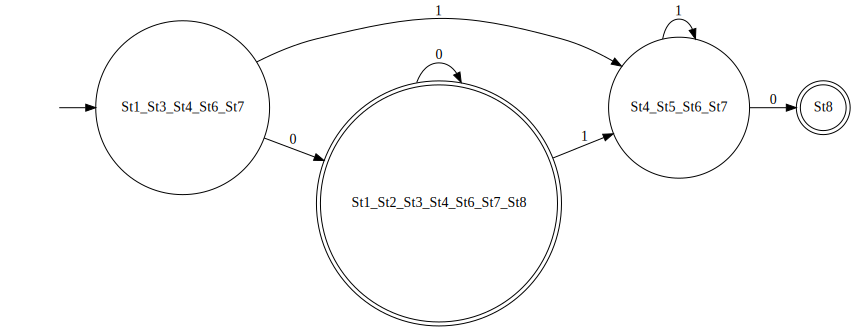

In [31]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80)

In [32]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80).render('dfa0s1s0')

'dfa0s1s0.pdf'

In [33]:
no010 = md2mc('''
DFA
IF : 1 -> IF
IF : 0 -> F0

F0 : 0 -> F0
F0 : 1 -> F1

F1 : 0 -> BH
F1 : 1 -> IF

BH : 0|1 -> BH

''')

Generating LALR tables


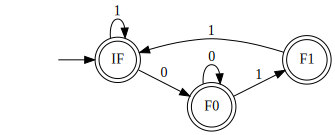

In [34]:
dotObj_dfa(no010)

In [35]:
dotObj_dfa(no010).render('no010')

'no010.pdf'

# To verify, define has010 and intersect.

In [36]:
has010 = min_dfa(nfa2dfa(re2nfa("(0+1)*010(010)*")))

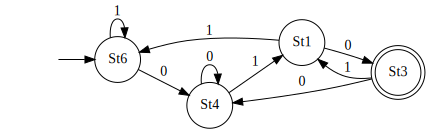

In [37]:
dotObj_dfa(has010)

In [38]:
no010_and_has010 = intersect_dfa(no010, has010)

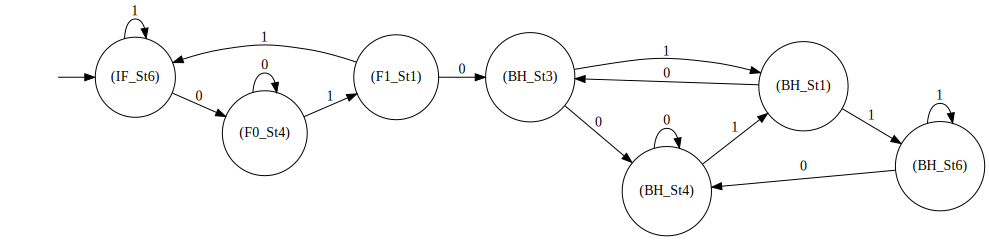

In [39]:
dotObj_dfa(no010_and_has010)

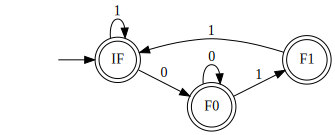

In [40]:
dotObj_dfa(no010)

In [41]:
REno010 =   "1* ( '' + 00* ( '' + 1(11*00*1)* ( '' + 11* ( '' + 00* ))))"

In [42]:
no010_RE = min_dfa(nfa2dfa(re2nfa(REno010)))

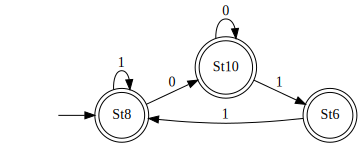

In [43]:
dotObj_dfa(no010_RE)

In [44]:
nfano010 = dfa2nfa(no010)

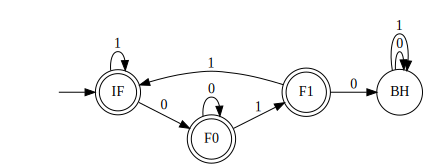

In [45]:
dotObj_nfa(nfano010)

In [46]:
gnfa010 = mk_gnfa(nfano010)

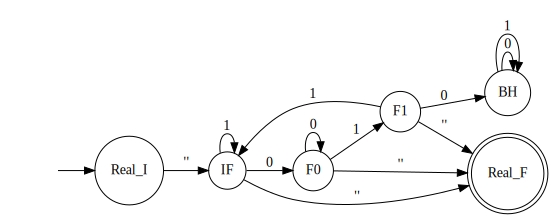

In [47]:
dotObj_gnfa(gnfa010)

In [48]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [49]:
(GF,DO,RE) = del_gnfa_states(gnfa010)

**** Eliminating state F1 ****
**** Eliminating state F0 ****
**** Eliminating state IF ****
**** Eliminating state BH ****


In [50]:
RE

'(((((0 ((0)* (1 1))) + 1) + 1))* (((0 ((0)* ((1 + "") + ""))) + "") + ""))'

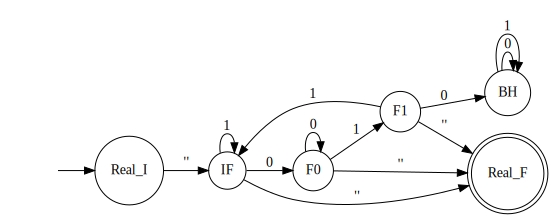

In [51]:
DO[0]

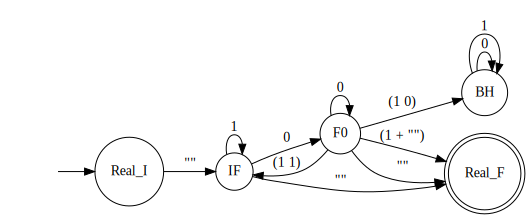

In [52]:
DO[1]

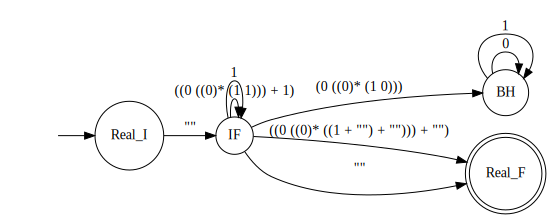

In [53]:
DO[2]

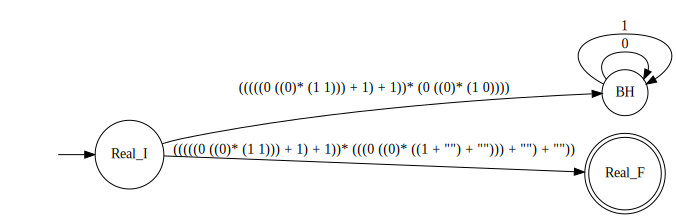

In [54]:
DO[3]